<a href="https://colab.research.google.com/github/fnavab/APS360-project/blob/main/Final_16k_VGG__RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Data loading
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import random
import torchvision.transforms as transforms
import torch
import numpy as np
import os
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
  train_dir = '/content/gdrive/My Drive/Colab Notebooks/16k_vgg_features/train'
  trainset = torchvision.datasets.DatasetFolder(train_dir, loader=torch.load, extensions=('.tensor'))

In [5]:
test_dir = '/content/gdrive/My Drive/Colab Notebooks/16k_vgg_features/test'

test_set = torchvision.datasets.DatasetFolder(test_dir, loader=torch.load, extensions=('.tensor'))

In [6]:
val_dir = '/content/gdrive/My Drive/Colab Notebooks/16k_vgg_features/val'
val_set= torchvision.datasets.DatasetFolder(val_dir, loader=torch.load, extensions=('.tensor'))


In [7]:
len(test_set)

3018

In [8]:
len(val_set)

2978

In [9]:
len(trainset)

9004

In [10]:
X_test = np.array([x.numpy() for x,_ in test_set])
y_test= np.array([y for _,y in test_set])

X_test = X_test.reshape((X_test.shape[0], -1))


In [11]:
X_val = np.array([x.numpy() for x,_ in val_set])
y_val= np.array([y for _,y in val_set])

X_val = X_val.reshape((X_val.shape[0],-1))

In [12]:

X_train = np.array([x.numpy() for x,_ in trainset])
y_train= np.array([y for _,y in trainset])

X_train = X_train.reshape((X_train.shape[0],-1))


In [17]:
# Random Forest
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


model = RandomForestClassifier(n_estimators=50, criterion="entropy",max_depth=10)

# Fit the model to our training data
start_time=time.time()
classifier=model.fit(X_train, y_train)
end_time=time.time()
print("Total time: " , (end_time-start_time))
# Make predictions
testing_predicted = model.predict(X_test)
score=accuracy_score(testing_predicted,y_test)
print("RF Test:", score)

Total time:  38.615779876708984
RF Test: 0.6398277004638834


Confusion matrix, without normalization
[[329  14   4   8  12   0  13  10]
 [ 28 249   3   5  20  11  21  38]
 [  0   3 264  83   0  19  10   2]
 [  1   0  68 260   0  17  24   2]
 [ 26  27   0   0 232  20  16  38]
 [  2   3  10  18   3 311  52   1]
 [  5   1   8  21   4  78 247   2]
 [ 40  49   0   6  47   4  19 210]]
Normalized confusion matrix
[[0.84 0.04 0.01 0.02 0.03 0.   0.03 0.03]
 [0.07 0.66 0.01 0.01 0.05 0.03 0.06 0.1 ]
 [0.   0.01 0.69 0.22 0.   0.05 0.03 0.01]
 [0.   0.   0.18 0.7  0.   0.05 0.06 0.01]
 [0.07 0.08 0.   0.   0.65 0.06 0.04 0.11]
 [0.01 0.01 0.03 0.04 0.01 0.78 0.13 0.  ]
 [0.01 0.   0.02 0.06 0.01 0.21 0.67 0.01]
 [0.11 0.13 0.   0.02 0.13 0.01 0.05 0.56]]


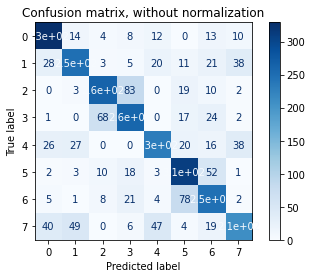

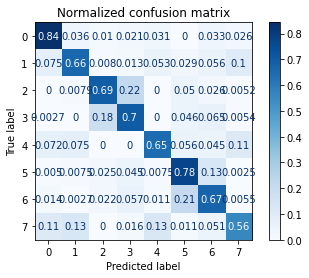

In [14]:
from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

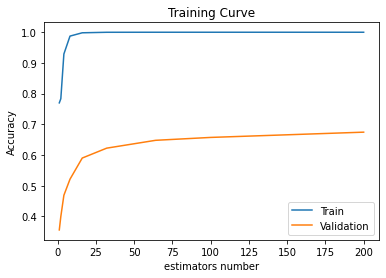

In [15]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
val_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, criterion="entropy")
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_score=accuracy_score(train_pred,y_train)
   train_results.append(train_score)
   val_pred = rf.predict(X_val)
   val_score=accuracy_score(val_pred,y_val)
   val_results.append(val_score)


plt.title("Training Curve")
plt.plot(n_estimators, train_results, label="Train")
plt.plot(n_estimators, val_results, label="Validation")
plt.xlabel("estimators number")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show() 


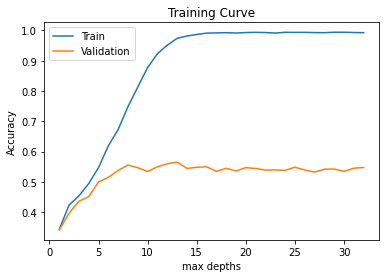

In [16]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
val_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=max_depth)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_score=accuracy_score(train_pred,y_train)
   train_results.append(train_score)
   val_pred = rf.predict(X_val)
   val_score=accuracy_score(val_pred,y_val)
   val_results.append(val_score)


plt.title("Training Curve")
plt.plot(max_depths, train_results, label="Train")
plt.plot(max_depths, val_results, label="Validation")
plt.xlabel("max depths")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show() 